# Data Preparation 

In [1]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv, glob, os, time
from datetime import date
from IPython.display import display, Image
import warnings
warnings.filterwarnings("ignore")

C:\Users\Elid-PC.DESKTOP-MG9DS93\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [14]:
csv = (glob.glob('*.csv'))[0]
print ('Filename for Summary Table: ' + csv)

start_time = time.time()

df_Summary = pd.read_csv(csv, index_col=0,engine = 'python')
count = 1
for i in range(0, len(df_Summary)):
    ticker = df_Summary['Ticker'][i]
    #try:
    #Downloads history data from Yahoo Finance based on last 3 year
    end_date = date.today()
    start_date = end_date.replace(year=date.today().year -3)

    #Downloads data from Yahoo
    df = pdr.DataReader(ticker, 'yahoo', start_date, end_date)

    # Create Return Variables
    
    df['Ret_Diff'] = df['Adj Close'].diff()
    df['Ret_%_Chg'] = df['Adj Close'].pct_change()
    df['Ret_Log'] = np.log(df['Adj Close'])-np.log(df['Adj Close'].shift(1))
    df['Vol'] = df['Ret_Log'].rolling(252).std()*(252**0.5)
    df=df.dropna()
    df=df.reset_index(drop = True)
    csv_dir =  'Data\\' + ticker +'\\' + ticker +'.csv'
    df.to_csv(csv_dir,encoding='utf-8', index=True, header = True)

    count = count + 1 
    #except:
        #print('Failed to Download: ' + str(ticker))
        #continue

print('Number of History Download ' + str(count-1) + ' Out of ' + str(i+1))
print("--- %s seconds taken ---" % round((time.time() - start_time),0))

Filename for Summary Table: Summary_DJIA30.csv
Number of History Download 29 Out of 29
--- 13.0 seconds taken ---


Filename for Summary Table: Summary_DJIA30.csv
Number of Charts (Returns vs Volatility) plotted: 29


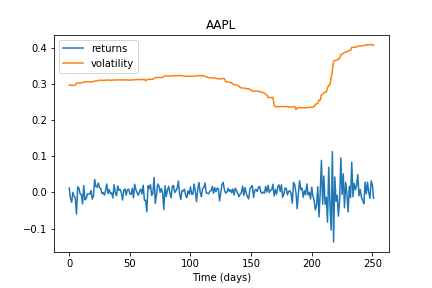

<Figure size 432x288 with 0 Axes>

In [28]:
#Summary Table
csv = (glob.glob('*.csv'))[0]
print ('Filename for Summary Table: ' + csv)

#Data Preparation from CSV  
df_Summary = pd.read_csv(csv,index_col=0,engine = 'python')
n_days = 252 #Number of days to use as dataset based on average trading days per year 

#Define empty array
dataset = np.empty((n_days, 0)) # Initialised the array as zero
reject = []
#Create Dataset
for i in range(0, len(df_Summary)):
    try:
        ticker = df_Summary['Ticker'][i]
        df_ticker = pd.read_csv('Data//'+ ticker + '//' + ticker + '.csv',engine = 'python')

        #Create new dataset array based on 'Return_log' and 'Volatility'
        asset=df_ticker[['Ret_Log','Vol']].tail(n_days).values
        dataset = np.append(dataset, asset, axis=1)

        # Visualize returns and volatility
        plt.plot(dataset[:, i], label='returns')
        plt.plot(dataset[:, i+1], label='volatility')
        plt.legend()
        plt.title(ticker)
        plt.xlabel('Time (days)')
        plt.savefig('Data//'+ ticker + '//' + ticker +'_Returns vs Volatility.png')
        plt.clf()
    
    except:
        continue
    
print('Number of Charts (Returns vs Volatility) plotted: ' + str(i+1))

# Display an example of Returns vs  Volatility Chart - Apple 
display(Image(filename='Data//AAPL//AAPL_Returns vs Volatility.png'))

In [27]:
len(df_ticker[['Ret_Log','Vol']].tail(n_days).values)

50